In [25]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [26]:
### Poblacion

pob_radios = pd.read_csv('./info/pob2010')#[['COD_2010', 'n_PERSONA_REF_ID']]
pob_radios['COD_2010'] = pob_radios['radio'].astype(str).str.zfill(9)
pob_radios['PROV_'] = pob_radios['COD_2010'].str[:2]


In [31]:
rad_cirs = pd.read_csv('./radios_circuitos.csv').astype(str)
rad_cirs['COD_2010'] = rad_cirs['COD_2010'].astype(str).str.zfill(9)
rad_cirs['PROV_'] = rad_cirs['PROV_'].astype(str).str.zfill(2)

# rad_cirs.head()

# []
# PROV_ 	DEPTO_ 	FRACC_


# 	PROV_	DEPTO_	FRACC_	COD_2010
# count	52401.0	52401.0	52401.0	52401.0
# mean	2.0	3.0	2.0	9.0

In [32]:
result_pob = rad_cirs.merge(pob_radios, how = 'left')

pob = pd.concat([pob_radios.groupby(['PROV_'])[['TOTAL']].sum(),
          result_pob.groupby(['PROV_'])[['TOTAL']].sum()], axis = 1).fillna(0).astype(int)

print(round(100*pob.sum().iloc[1]/pob.sum().iloc[0], 1))

pob['pct'] = round(100*pob.iloc[:, 1]/pob.iloc[:, 0], 1)

89.5


In [33]:
provs = pd.read_csv('./info/provs.csv', index_col = 'PROV')[['NOMPROV']]
provs.index = provs.index.astype(str).str.zfill(2).values

table = provs.merge(pob, left_index = True, right_index = True).set_index('NOMPROV')
table[['TOTAL']] = np.round(table[['TOTAL']].values/1e6, 2)

In [34]:
#pip install tabulate

print(table.to_markdown())

| NOMPROV                         |   TOTAL |   TOTAL |   pct |
|:--------------------------------|--------:|--------:|------:|
| Ciudad Autónoma de Buenos Aires |    2.89 |    2.89 | 100   |
| Buenos Aires                    |   15.63 |   15.62 | 100   |
| Catamarca                       |    0.37 |    0.37 | 100   |
| Córdoba                         |    3.31 |    1.32 |  40   |
| Corrientes                      |    0.99 |    0.99 | 100   |
| Chaco                           |    1.06 |    1.05 |  99.7 |
| Chubut                          |    0.51 |    0.51 |  99.9 |
| Entre Ríos                      |    1.24 |    1.24 | 100   |
| Formosa                         |    0.53 |    0    |   0   |
| Jujuy                           |    0.67 |    0.67 | 100   |
| La Pampa                        |    0.32 |    0.32 | 100   |
| La Rioja                        |    0.33 |    0    |   0   |
| Mendoza                         |    1.74 |    1.64 |  94.1 |
| Misiones                        |    1

In [6]:
## Provincias IGN
url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/provincia/json'
provs_geo = gpd.read_file(url)

### Geo Radios censales 
radios = gpd.read_file('./radios_IGN_2010_WGS84/')

In [7]:
## CRS Para buena visualizacion
fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}

rad_cirs_geo = gpd.GeoDataFrame(rad_cirs.merge(radios[['COD_2010', 'geometry']]))


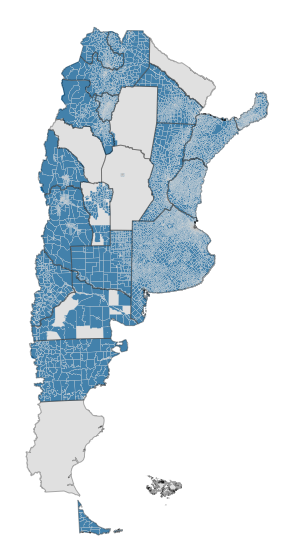

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (7, 10))

rad_cirs_geo.to_crs(fancy_crs).plot(ax = ax, edgecolor = 'w', lw = .2)
provs_geo.to_crs(fancy_crs).plot(color = '.6', edgecolor = 'k', lw = 1, alpha = .3,ax = ax)

ax.set_xlim(-.75e6, 1.25e6)
ax.set_ylim(-2.3e6, 1.6e6)

plt.axis('off')
plt.savefig('./circuitos_CNE.png')
plt.show()